## __Titanic dataset__

`Source`: https://www.kaggle.com/datasets/waqi786/titanic-dataset

- PassengerID: Unique identifier for each passenger.
- Pclass: Passenger class (1st, 2nd, 3rd).
- Name: Full name of the passenger.
- Sex: Gender of the passenger.
- Age: Age of the passenger.
- SibSp: Number of siblings/spouses aboard.
- Parch: Number of parents/children aboard.
- Ticket: Ticket number.
- Fare: Ticket fare.
- Cabin: Cabin number.
- Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
- Survived: Survival status (0 = No; 1 = Yes).

__Usage:__
This dataset is ideal for practice in classification tasks, particularly for predicting binary outcomes such as survival status.

__Aim of the dataset:__ is to classify whether a person survived in Titanic or not.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

### __Loading the dataset and checking the structure of the data__

- Finding missing values.
- Checking for categorical variables.
- Imputing the missing values with `mean` or `median` for numerical values.
- Imputing the missing values with `mode` for categorical values.
- Dropping columns which have too many missing values.

In [8]:
# Load the Titanic dataset from URL

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

In [9]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### __Observations:__

- Here, minimum and maximum values of `Age` ranges from 0.42 to 80.
- For that reason, we can find outliers in the dataset within the `Age` column.
- Hence, taking the mean value will not be proper because of the presence of outliers.
- We will use Median.

In [19]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
# Check for missing values

titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### __Observations:__

- Columns `Age`, `Cabin` and `Embarked` have missing values.
- `Age` is a numerical column.
- `Cabin` has too many missing values.
- `Sex`, `Embarked`, `Pclass` are categorical variables.

In [24]:
# Check the categories in the categorical variables.

titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [26]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [28]:
titanic_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### __Observations__

- For categorical variables, we will use the mode i.e. the category having highest count.
- For `Embarked`, it will be `S`.
- Since, `Cabin` has too many missing values, we can drop the column from the dataset.

In [31]:
titanic_df['Embarked'].mode()[0]

'S'

In [33]:
titanic_df['Age'].median()

28.0

In [35]:
# Handle missing values in Age by imputing the median

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [37]:
# Handle missing values in Embarked by imputing the mode

titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [39]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [43]:
# Since Cabin has too many missing values, we can drop the column
# Dropping Passengers, Name, Ticket column as its not needed

titanic_df.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [45]:
# Drop rows with missing target values (Survived)

titanic_df.dropna(subset=['Survived'], inplace=True)

In [47]:
# Encode Categorical variables

label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

In [49]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### __Finding the outliers in the data using Box Plot__

- Finding the outliers in the dataset.
- Removing them.

<Axes: ylabel='Age'>

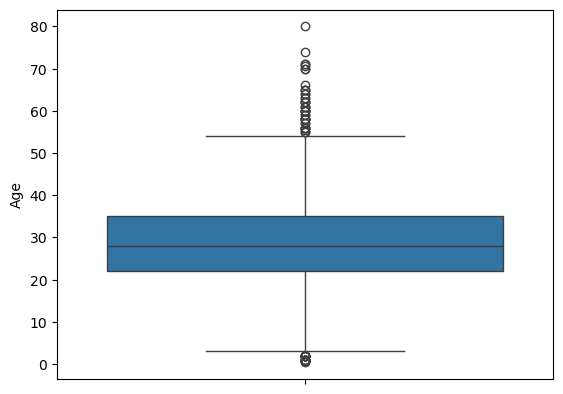

In [52]:
sns.boxplot(y = titanic_df["Age"])

<Axes: ylabel='Fare'>

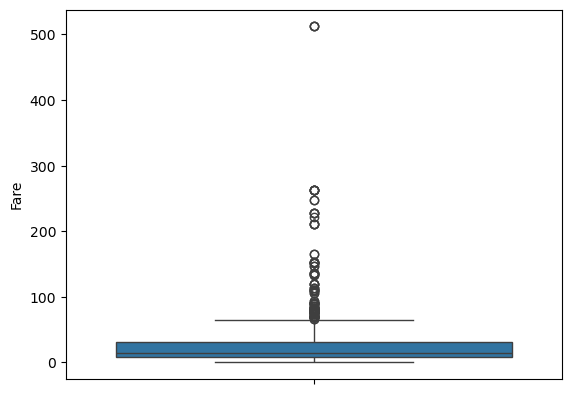

In [54]:
sns.boxplot(y = titanic_df["Fare"])

#### __Observations:__

- Here, `Age` and `Fare` contain outliers.

In [57]:
# Calculate Q1, Q3 and IQR For Fare

Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q3,IQR)

7.9104 31.0 23.0896


In [59]:
# Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR

outliers = titanic_df[(titanic_df['Fare'] < (Q1 - 1.5 * IQR)) | (titanic_df['Fare'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'fare':", len(outliers))

Number of outliers in 'fare': 116


In [61]:
# Removing outliers

titanic_df_clean = titanic_df[~((titanic_df['Fare'] < (Q1 - 1.5 * IQR)) | (titanic_df['Fare'] > (Q3 + 1.5 * IQR)))]
print("Data shape after outlier removal:", titanic_df_clean.shape)

Data shape after outlier removal: (775, 8)


<Axes: ylabel='Fare'>

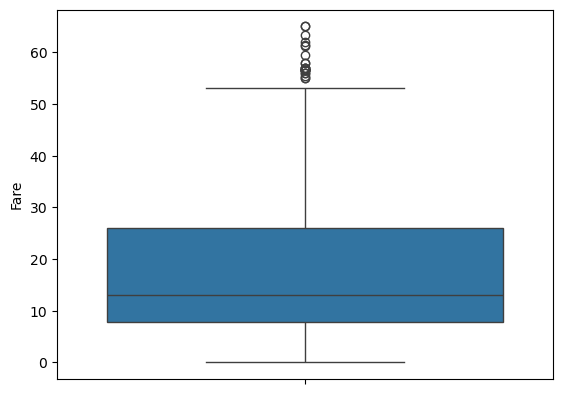

In [63]:
sns.boxplot(y = titanic_df_clean["Fare"])

In [65]:
# Calculate Q1, Q3 and IQR For Age

Q1 = titanic_df_clean['Age'].quantile(0.25)
Q3 = titanic_df_clean['Age'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q3,IQR)

22.0 34.0 12.0


In [67]:
# Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR

outliers = titanic_df_clean[(titanic_df_clean['Age'] < (Q1 - 1.5 * IQR)) | (titanic_df_clean['Age'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'age':", len(outliers))

Number of outliers in 'age': 67


In [69]:
# Removing outliers

titanic_df_clean = titanic_df_clean[~((titanic_df_clean['Age'] < (Q1 - 1.5 * IQR)) | (titanic_df_clean['Age'] > (Q3 + 1.5 * IQR)))]
print("Data shape after outlier removal:", titanic_df_clean.shape)

Data shape after outlier removal: (708, 8)


<Axes: ylabel='Age'>

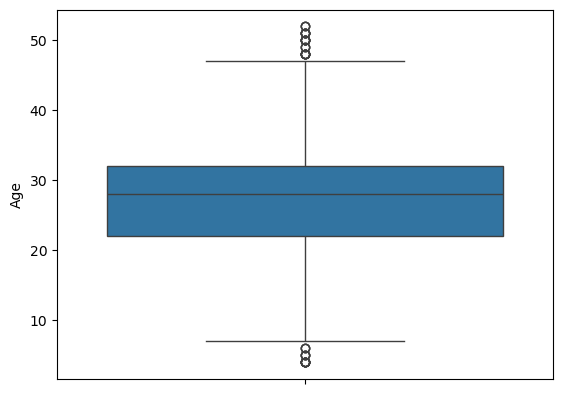

In [71]:
sns.boxplot(y = titanic_df_clean["Age"])

### __Performing Vertical and Horizontal split of the data and scaling the data__

In [74]:
X = titanic_df_clean.drop(columns = "Survived")
y = titanic_df_clean["Survived"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [78]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
507,1,1,28.0,0,0,26.55,2
784,3,1,25.0,0,0,7.05,2
83,1,1,28.0,0,0,47.10,2
17,2,1,28.0,0,0,13.00,2
323,2,0,22.0,1,1,29.00,2


In [80]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
147,3,0,9.0,2,2,34.3750,2
313,3,1,28.0,0,0,7.8958,2
417,2,0,18.0,0,2,13.0000,2
251,3,0,29.0,1,1,10.4625,2
766,1,1,28.0,0,0,39.6000,0


### __Scaling the dataset__

In [ ]:
# Scale the numerical columns

# scaler = StandardScaler()
# numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
# X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
# X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

### __Model creation (Logistic Regression)__

In [ ]:
# Setting up the Logistic Regression classifier

logistic_reg = LogisticRegression(random_state=42)
logistic_reg

In [ ]:
# Defining the parameters for GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'max_iter': [100, 500, 1000]
}

In [ ]:
# Applying GridSearchCV for hyperparameter tuning

grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

In [ ]:
# Getting the best estimator

best_lr = grid_search.best_estimator_
best_lr

In [ ]:
y_pred_train_log_reg = best_lr.predict(X_train)
y_pred_test_log_reg = best_lr.predict(X_test)

y_pred_test_proba_log_reg = best_lr.predict_proba(X_test)[:,1]

In [ ]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_proba_log_reg,
    'Predicted Label': y_pred_test_log_reg,
})

# Display the first 5 instances in the result dataframe
results_df.head()

In [ ]:
# Calculate the training and testing accuracy

training_accuracy = accuracy_score(y_train, y_pred_train_log_reg)
testing_accuracy = accuracy_score(y_test, y_pred_test_log_reg)

print("Logistic Regression")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

In [ ]:
# Printing the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred_test_log_reg))

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test_log_reg)
print("Confusion Matrix:")
cm

In [ ]:
# Plotting the confusion matrix

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
importance_of_features = best_lr.coef_
importance_of_features = importance_of_features.flatten()
importance_of_features

In [ ]:
X.columns

In [ ]:
# Create a dataframe for the coefficients and the respective columns

df_lg = pd.DataFrame(importance_of_features, X.columns)
df_lg

In [ ]:
# AUC-ROC Curve

auc = roc_auc_score(y_test, y_pred_test_proba_log_reg)
auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba_log_reg)

In [ ]:
# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Printing the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

In [ ]:
# Displaying all parameter combinations and their scores
results = pd.DataFrame(grid_search.cv_results_)
print("All parameter combinations and their scores:")
results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
results

### __Model creation (Naive bayes)__

In [174]:
# Import Required Libraries and apply Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB

In [183]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Setting up the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the training and testing set
y_pred_train_nb = nb_model.predict(X_train)
y_pred_test_nb = nb_model.predict(X_test)

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_nb)
testing_accuracy = accuracy_score(y_test, y_pred_test_nb)
print("\nNaïve Bayes:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_test_proba_nb = nb_model.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_proba_nb,
    'Predicted Label': y_pred_test_nb,
})

# Display the first 5 instances in the result dataframe
results_df.head()


Naïve Bayes:
Training Accuracy: 0.7636363636363637
Testing Accuracy: 0.784037558685446


,Actual Label,Predicted Probability,Predicted Label
147,0,0.765565,1
313,0,0.014944,0
417,1,0.898620,1
251,0,0.840589,1
766,0,0.748085,1


In [ ]:

nb_model

In [ ]:
r

In [ ]:
# Printing the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred_test_nb))

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_test_nb)
print("Confusion Matrix:")
cm_nb

In [ ]:
# Plotting the confusion matrix

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
auc = roc_auc_score(y_test, y_pred_test_proba_nb)
auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba_nb)

In [ ]:
# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### __Model creation (KNN and Regularization)__

In [82]:
# Import Required Libraries and apply K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Normalizer

In [84]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
507,1,1,28.0,0,0,26.55,2
784,3,1,25.0,0,0,7.05,2
83,1,1,28.0,0,0,47.10,2
17,2,1,28.0,0,0,13.00,2
323,2,0,22.0,1,1,29.00,2


In [86]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
normalizer = Normalizer()

X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [93]:
X_train

array([[-0.8563913 ,  0.27057275, -0.01820633, ..., -0.15857403,
         0.28851388,  0.21731658],
       [ 0.44318793,  0.44736199, -0.240463  , ..., -0.26218454,
        -0.49541407,  0.35930883],
       [-0.64888773,  0.20501299, -0.01379494, ..., -0.12015155,
         0.68824388,  0.16466079],
       ...,
       [ 0.33270003,  0.33583348,  0.71435004, ..., -0.19682125,
        -0.31154001,  0.26973221],
       [-0.48569247, -0.33660487,  0.47072178, ..., -0.08993343,
         0.3868574 , -0.49612253],
       [ 0.2261417 , -0.50072471, -0.01535996, ...,  0.28010743,
         0.13674547, -0.73801906]])

In [163]:
# Define the parameters for GridSearchCV
param_grid = {
    'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()

grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                         21]},
             return_train_score=True, scoring='accuracy')

In [164]:
# Getting the best estimator

best_knn = grid_search_knn.best_estimator_
best_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [168]:
# Predict on the training and testing set
y_pred_train_knn = best_knn.predict(X_train)
y_pred_test_knn = best_knn.predict(X_test)

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_knn)
testing_accuracy = accuracy_score(y_test, y_pred_test_knn)
print("\nKNN:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_test_proba_knn = best_knn.predict_proba(X_test)[:, 1]


KNN:
Training Accuracy: 0.8262626262626263
Testing Accuracy: 0.7981220657276995


In [151]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_proba_knn,
    'Predicted Label': y_pred_test_knn,
})

# Display the first 5 instances in the result dataframe
results_df.head()

,Actual Label,Predicted Probability,Predicted Label
147,0,0.222222,0
313,0,0.000000,0
417,1,1.000000,1
251,0,0.444444,0
766,0,0.444444,0


In [153]:
best_knn_params = grid_search_knn.best_params_
best_knn_params

{'metric': 'euclidean', 'n_neighbors': 9}

In [155]:
# Printing the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred_test_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       133
           1       0.82      0.53      0.64        80

    accuracy                           0.78       213
   macro avg       0.79      0.73      0.74       213
weighted avg       0.79      0.78      0.77       213



In [157]:
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
print("Confusion Matrix:")
cm_knn

Confusion Matrix:


array([[124,   9],
       [ 38,  42]])

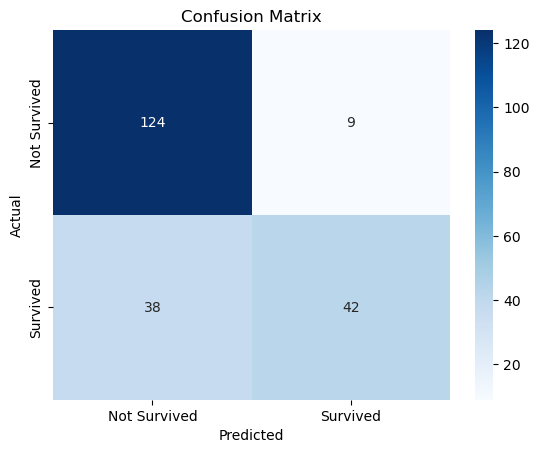

In [159]:
# Plotting the confusion matrix

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [136]:
auc = roc_auc_score(y_test, y_pred_test_proba_knn)
auc

0.8458646616541354

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba_knn)

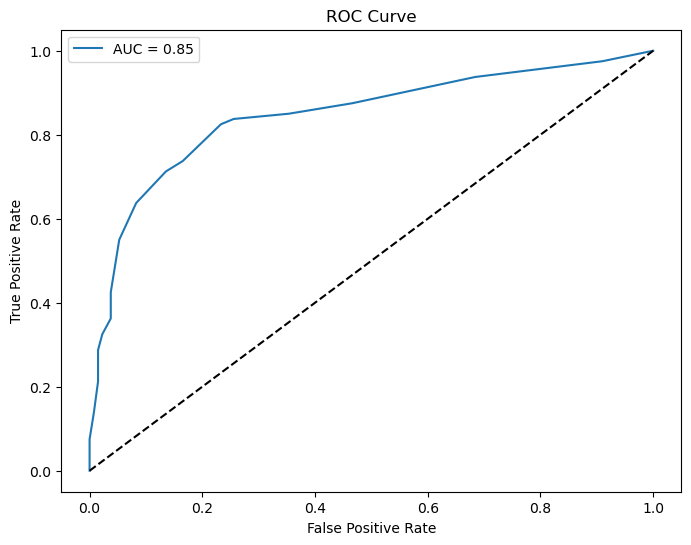

In [140]:
# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()